In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np

data=np.load('/content/drive/My Drive/Colab Notebooks/Mango/Dataset/data.npy')
target=np.load('/content/drive/My Drive/Colab Notebooks/Mango/Dataset/target.npy')



### Convolutional Neural Network Architecture

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

              # number of kernal,kernal size
model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Dropout(0.5))

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(4,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

### Training the CNN for 200 epochs using train data 

In [7]:
history=model.fit(train_data,train_target,epochs=2000, validation_split = 0.2)

Epoch 1/2000
12/12 [==============================] - 5s 393ms/step - loss: 1.2422 - accuracy: 0.4583 - val_loss: 1.2261 - val_accuracy: 0.5495
Epoch 2/2000
12/12 [==============================] - 5s 384ms/step - loss: 1.2379 - accuracy: 0.4833 - val_loss: 1.2277 - val_accuracy: 0.4835
Epoch 3/2000
12/12 [==============================] - 5s 385ms/step - loss: 1.2397 - accuracy: 0.4806 - val_loss: 1.2188 - val_accuracy: 0.5275
Epoch 4/2000
12/12 [==============================] - 5s 383ms/step - loss: 1.2321 - accuracy: 0.5083 - val_loss: 1.2134 - val_accuracy: 0.5385
Epoch 5/2000
12/12 [==============================] - 5s 383ms/step - loss: 1.2420 - accuracy: 0.4806 - val_loss: 1.2160 - val_accuracy: 0.4396
Epoch 6/2000
12/12 [==============================] - 5s 384ms/step - loss: 1.2237 - accuracy: 0.4750 - val_loss: 1.2146 - val_accuracy: 0.5275
Epoch 7/2000
12/12 [==============================] - 5s 386ms/step - loss: 1.2195 - accuracy: 0.5167 - val_loss: 1.2046 - val_accuracy:

### Visualizing the loss and the accuracy of trained CNN

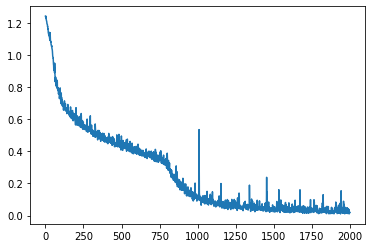

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

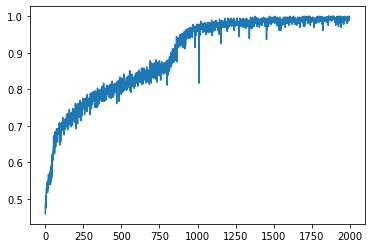

In [9]:
plt.plot(history.history['accuracy'])
#if not working replace 'accuracy' with 'acc'

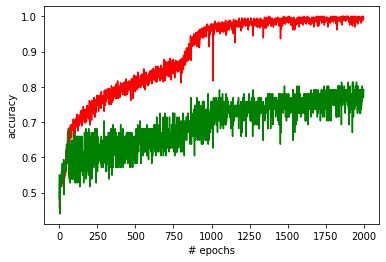

In [10]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

### Evaluating the CNN using testing_data

This returns the loss and the accuracy of the Neural Network for Testing data

In [11]:
print(model.evaluate(test_data,test_target))

2/2 [==============================] - 1s 300ms/step - loss: 1.9184 - accuracy: 0.7255
[1.9183835983276367, 0.7254902124404907]


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 374, 249, 256)     7168      
_________________________________________________________________
activation (Activation)      (None, 374, 249, 256)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 187, 124, 256)     0         
_________________________________________________________________
dropout (Dropout)            (None, 187, 124, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 185, 122, 128)     295040    
_________________________________________________________________
activation_1 (Activation)    (None, 185, 122, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 92, 61, 128)       0

In [13]:
model.save_weights('Mango_v1.h5')